# Рынок заведений общественного питания Москвы

<div class="alert alert-info" role="alert">
Для открытия небольшого кафе в Москве, подготовим исследование рынка общественного питания для инвесторов.

Данные представляют собой датасет с информацией о идентификаторе объектов, названии объекта общественного питания, является ли данное заведение сетевым, тип объекта общественного питания, его адрес и количество посадочных мест.

Шаг 1. Загрузим данные и подготовим их к анализу
Добавим необходимые столбцы для удобства анализа, сравнения и получения дополнительных данных, убедимся в отсутствии пропущенных значений и дубликатов, при необходимости обработаем их.

Шаг 2. Анализ данных

Исследуем соотношение видов объектов общественного питания по количеству. Построим график.
    
Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.
    
Определим для какого вида объекта общественного питания характерно сетевое распространение.
    
Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
    
Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики.
    
Построим график топ-10 улиц по количеству объектов общественного питания. 
Определим в каких районах Москвы находятся эти улицы.

Найдем число улиц с одним объектом общественного питания. 
Определим  в каких районах Москвы находятся эти улицы.
    
Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.
Выявим закономерности.
    
Шаг 3. Подготовим презентацию
Подготовим презентацию исследования для инвесторов в формате pdf.
Приложим ссылку на презентацию.
    
Шаг 4. Сформулируем выводы и рекомендации

</div>

# Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/datasets/rest_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Таблица заполенеа полностью, отсутствуют пропуски, типы данных соответствуют заполненным строкам

In [3]:
df.duplicated().sum()

0

В данных отсутствуют дубликаты.

In [4]:
df.sample(20)

,id,object_name,chain,object_type,address,number
4626,29881,ДЕЛО ВКУСА,нет,кафе,"город Москва, Южнопортовая улица, дом 5, строе...",85
11586,176328,Суши-бар Пиццерия Милана,нет,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
14298,222520,Кафе,нет,кафе,"город Москва, Большая Черёмушкинская улица, дом 1",20
12197,191773,Вьетнамская кухня,нет,кафе,"город Москва, Ярославское шоссе, дом 146, корп...",20
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
10953,175218,КАФЕ,нет,кафе,"город Москва, Малахитовая улица, дом 14, строе...",12
4125,25012,МОНТЕРОССО,нет,кафе,"город Москва, Воронцовская улица, дом 2/10, ст...",58
11446,184656,Пекарня,нет,закусочная,"город Москва, Ореховый бульвар, владение 24, к...",4
7592,70726,Предприятие быстрого обслуживания «Бургер Кинг»,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 95, корпус 1",54
774,152117,Столовая при ГБОУ Школа 1231,нет,столовая,"город Москва, Новодевичий проезд, дом 2",24


Столбец - chain состоит из 2-х групп (заведения сетевые и не сетевые). Улицы начинаются с "город Москва..", за исклюением нескольких строк, учтем их при отделении названия улиц.

In [5]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Тип объекта общественного питания разделен на 9 групп

In [6]:
df['number'].describe().round()

count    15366.0
mean        60.0
std         75.0
min          0.0
25%         12.0
50%         40.0
75%         80.0
max       1700.0
Name: number, dtype: float64

Всего исследуемых объектов - 15366;
Минимальное число посадочных мест - 0;
Максимальное число посадочных мест - 1700;
Среднее число посадочных мест - 60;
Медианное число - 40.

### Вывод
Таблица заполенеа полностью, отсутствуют пропуски, типы данных соответствуют заполненным строкам. Тип объекта общественного питания разделен на 9 групп. Столбец - chain состоит из 2-х групп (заведения сетевые и не сетевые). Улицы начинаются с "город Москва..", за исклюением нескольких строк, учтем их при отделении названия улиц.
Всего исследуемых объектов - 15366;
Минимальное число посадочных мест - 0;
Максимальное число посадочных мест - 1700;
Среднее число посадочных мест - 60;
Медианное число - 40.

# Шаг 2. Анализ данных

## Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [7]:
df_object_type = df.pivot_table(index='object_type', values='id', aggfunc='count').sort_values('id', ascending=True).reset_index() 
df_object_type

,object_type,id
0,магазин (отдел кулинарии),273
1,закусочная,360
2,кафетерий,398
3,буфет,585
4,бар,856
5,предприятие быстрого обслуживания,1923
6,ресторан,2285
7,столовая,2587
8,кафе,6099


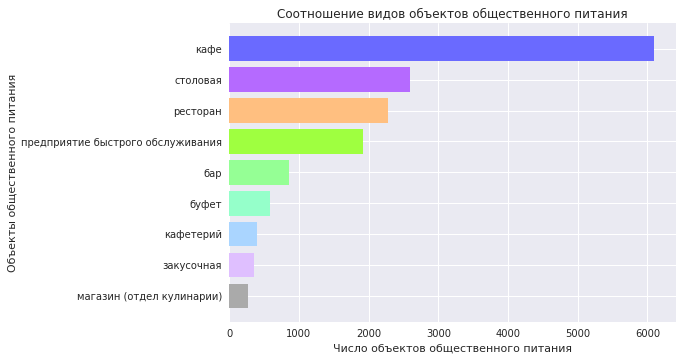

In [8]:
with plt.style.context('seaborn'):
    plt.barh(df_object_type['object_type'],df_object_type['id'],    
    color=['#AAAAAA', '#DFBFFF', '#AAD5FF', '#95FFCA', '#95FF95', '#9FFF40', '#FFBF80', '#B56AFF', '#6A6AFF'])
    plt.title('Соотношение видов объектов общественного питания')
    plt.xlabel('Число объектов общественного питания')
plt.ylabel('Объекты общественного питания')
plt.show()

Тип объекта общественного питания разделен на 9 групп. 
Самая большая категория - кафе: 6099 объектов;
Далее выделяются столовые, рестораны и предприятия быстрого обслуживания их число 2587/2285/1923;
Самая малочисленная группа это бары, буфеты, кафетерии, закусочные и магазины с отделами кулинарии.

In [9]:
df_address = df.pivot_table(
    index='address', values='object_name', aggfunc='count').sort_values('object_name', ascending=False).reset_index()
df_address.head(20)

,address,object_name
0,"город Москва, Ходынский бульвар, дом 4",95
1,"город Москва, Пресненская набережная, дом 2",63
2,"город Москва, проспект Мира, дом 211, корпус 2",60
3,"город Москва, Кировоградская улица, дом 13А",53
4,"город Москва, площадь Киевского Вокзала, дом 2",48
5,"город Москва, улица Земляной Вал, дом 33",46
6,"город Москва, Мытная улица, дом 74",46
7,"город Москва, улица Новый Арбат, дом 21",42
8,"город Москва, улица Ленинская Слобода, дом 26",41
9,"город Москва, Ярцевская улица, дом 19",40


Большие торговые центры концентрируют большое число объектов общественного питания. Чем больше объект, тем больше в нем данных объектов.
В одном торговом центре располагается объектов больше, чем на многих улицах большой протяженности.

## Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [10]:
df_chain = df.pivot_table(index='chain', values='id', aggfunc='count').sort_values('id', ascending=True).reset_index() 

In [11]:
df_chain['perc'] = df_chain['id']/df_chain['id'].sum()
df_chain.style.format({'perc':'{:,.1%}'.format})

,chain,id,perc
0,да,2968,19.3%
1,нет,12398,80.7%


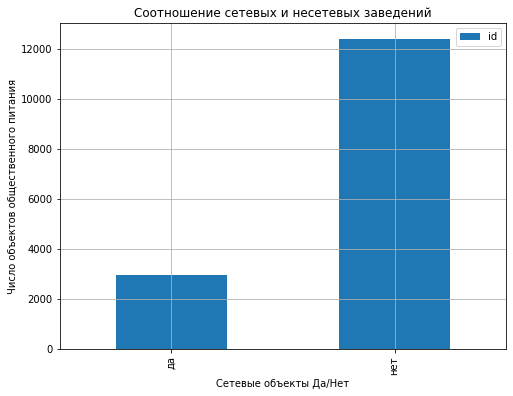

In [12]:
df_chain.plot(kind='bar', y='id', x='chain', grid=True, figsize=(8, 6))
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Сетевые объекты Да/Нет')
plt.ylabel('Число объектов общественного питания');

Число сетевых объектов в Москве около 3-х тысяч, что составляет 20% от общего числа всех заведений Москвы

## Определим для какого вида объекта общественного питания характерно сетевое распространение.

In [13]:
df_chain_yes = df.query('chain == "да"')
df_object_type_chain_yes = df_chain_yes.pivot_table(
    index='object_type', values='id', aggfunc='count').sort_values('id', ascending=True).reset_index() 

In [14]:
df_object_type_chain_yes['perc'] = df_object_type_chain_yes['id']/df_object_type_chain_yes['id'].sum()
df_object_type_chain_yes.style.format({'perc':'{:,.1%}'.format})

,object_type,id,perc
0,столовая,3,0.1%
1,буфет,11,0.4%
2,бар,37,1.2%
3,кафетерий,52,1.8%
4,закусочная,56,1.9%
5,магазин (отдел кулинарии),78,2.6%
6,ресторан,544,18.3%
7,предприятие быстрого обслуживания,791,26.7%
8,кафе,1396,47.0%


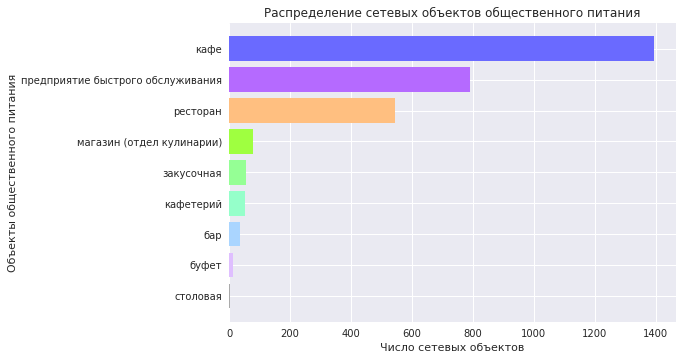

In [15]:
with plt.style.context('seaborn'):
    plt.barh(df_object_type_chain_yes['object_type'],df_object_type_chain_yes['id'], 
    color=['#AAAAAA', '#DFBFFF', '#AAD5FF', '#95FFCA', '#95FF95', '#9FFF40', '#FFBF80', '#B56AFF', '#6A6AFF'])
    plt.title('Распределение сетевых объектов общественного питания')
    plt.xlabel('Число сетевых объектов')
plt.ylabel('Объекты общественного питания')
plt.show()

При распределении сетевых объектов общественного питания выделяются кафе с долей в 47%, предприятия быстрого обслуживания в 26.7% и рестораны в 18.3%, доля остальных объектов незначительна

## Определим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [16]:
df_object_type_number = df_chain_yes.groupby(
    'object_type').agg({'number': 'mean', 'id': 'count'}).sort_values('id', ascending=False).round().reset_index()
df_object_type_number

,object_type,number,id
0,кафе,47.0,1396
1,предприятие быстрого обслуживания,40.0,791
2,ресторан,100.0,544
3,магазин (отдел кулинарии),9.0,78
4,закусочная,14.0,56
5,кафетерий,12.0,52
6,бар,53.0,37
7,буфет,13.0,11
8,столовая,112.0,3


Среднее число посадочных мест для кафе составляет 47, для предприятий быстрого обслуживания 40, для ресторанов 100.

Посмотрим как распределяются посадочные места в сетевых кафе

In [17]:
df_chain_cafe = df_chain_yes.query('object_type == "кафе"')
df_chain_cafe_group = df_chain_cafe.groupby(
    'object_name').agg({'number': 'mean', 'id': 'count'}).sort_values('id', ascending=False).round()
df_chain_cafe_group.head(10)

,number,id
object_name,,
Шоколадница,55.0,134
Домино'с Пицца,17.0,50
Хинкальная,50.0,32
Суши Wok,8.0,29
Кофе Хаус,58.0,28
KFC,39.0,26
Теремок,23.0,23
Папа Джонс,29.0,23
Starbucks,43.0,23


In [18]:
df_chain_cafe_group['number'].describe().round()

count    428.0
mean      50.0
std       44.0
min        0.0
25%       20.0
50%       40.0
75%       68.0
max      356.0
Name: number, dtype: float64

В сетевых кафе медианное значение посадочных мест составляет 40, среднее 50. Сетевые кафе (пиццерии) работающие в основном на доставку имеют малое число посадочных мест, также заведения в торговых центрах, рассчитанные на большую проходимость (Крошка Картошка, Теремок, Суши Wok), так же имеют мало число посадочных мест. Кофейни (Шоколадница, Кофе Хаус, Starbucks) имеют число посадочных мест выше медианного значения.

## Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест. Построим графики.

In [19]:
df_mean_number = df_object_type_number.sort_values('number', ascending=True)
df_mean_number

,object_type,number,id
3,магазин (отдел кулинарии),9.0,78
5,кафетерий,12.0,52
7,буфет,13.0,11
4,закусочная,14.0,56
1,предприятие быстрого обслуживания,40.0,791
0,кафе,47.0,1396
6,бар,53.0,37
2,ресторан,100.0,544
8,столовая,112.0,3


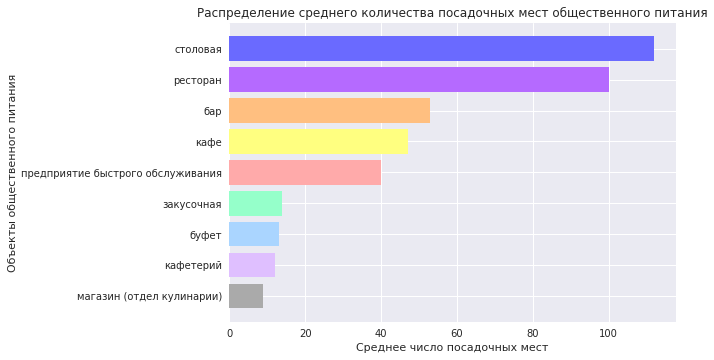

In [20]:
with plt.style.context('seaborn'):
    plt.barh(df_mean_number['object_type'],df_mean_number['number'], 
    color=['#AAAAAA', '#DFBFFF', '#AAD5FF', '#95FFCA', '#FFAAAA', '#FFFF80', '#FFBF80', '#B56AFF', '#6A6AFF'])
    plt.title('Распределение среднего количества посадочных мест общественного питания')
    plt.xlabel('Среднее число посадочных мест')
plt.ylabel('Объекты общественного питания')
plt.show()

Для объектов общественного четко выделяется 3 группы с малым, средним и большим числом посадочных мест. 
Самая большим числом посадочных мест обладают:  столовые - в среднем 112 мест и рестораны - в среднем 100 мест. 
Средняя категория с посадочными местами это бары, кафе и предприятия быстрого обслуживания с числом посадочных мест от 53 до 40; 
Самыми малыми объекты с посадочными местами это закусочные, буфеты, кафетерии и магазины с отделами кулинарии.

## Построим график топ-10 улиц по количеству объектов общественного питания. Определим в каких районах Москвы находятся эти улицы.

#### Выделим в отдельный столбец информацию об улице из столбца

In [21]:
street = df.copy()

Определим первую букву указания адреса

In [22]:
patter_start = '([\w1-9])'
street['street_N'] = street['address'].str.extract(pat = patter_start)[0]
street

,id,object_name,chain,object_type,address,number,street_N
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,г
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,г
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,г
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,г
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,г
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,г
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,г
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,г
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,г


Выделим название улицы заключенной между запятыми

In [23]:
street_first = street.query('street_N == "г"').reset_index()

In [24]:
pattern = ',*, ([\w1-9-\s]*),'
street_first['street'] = street_first['address'].str.extract(pat = pattern)[0]
street_first

,index,id,object_name,chain,object_type,address,number,street_N,street
0,0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,г,улица Егора Абакумова
1,1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,г,улица Талалихина
2,2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,г,Абельмановская улица
3,3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,г,Абрамцевская улица
4,4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,г,Абрамцевская улица
...,...,...,...,...,...,...,...,...,...
15294,15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,г,3-й Крутицкий переулок
15295,15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,г,улица Земляной Вал
15296,15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,г,улица Земляной Вал
15297,15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,г,поселение Московский


Избавимся от первого пробела в названии улицы 

In [25]:
street_first.update('Q'+ street_first[['street']].astype(str))

In [26]:
street_first['street'] = street_first['street'].replace({'Q':''}, regex=True)

Выделим название улицы указанной сразу

In [27]:
street_last = street.query('street_N != "г"').reset_index()

In [28]:
pattern_street_last = '([\w1-9-\s"]*),'
street_last['street'] = street_last['address'].str.extract(pat = pattern_street_last)[0]

Объединим таблицы с указанием улиц

In [29]:
data = pd.concat([street_last, street_first]).reset_index()
data

,level_0,index,id,object_name,chain,object_type,address,number,street_N,street
0,0,859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,П,Партизанская улица
1,1,860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,П,Партизанская улица
2,2,1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,П,Поречная улица
3,3,7691,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198,1,1-й Нагатинский проезд
4,4,7827,28214,Роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,С,Софийская набережная
...,...,...,...,...,...,...,...,...,...,...
15361,15294,15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,г,3-й Крутицкий переулок
15362,15295,15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,г,улица Земляной Вал
15363,15296,15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,г,улица Земляной Вал
15364,15297,15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,г,поселение Московский


#### Построим график топ-10 улиц по количеству объектов общественного питания

In [30]:
top_street = data.pivot_table(
    index='street', values='object_name', aggfunc='count').sort_values('object_name', ascending=False).reset_index()
top_street.head(12)

,street,object_name
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,162
6,Ленинский проспект,148
7,поселение Сосенское,139
8,проспект Вернадского,132
9,Кутузовский проспект,114


Мы получили названия улиц с самым большим числом объектов. Сюда вошли Зеленоград (непосредственно сам округ) и поселение Сосенское. Уберем их из списка улиц.

In [31]:
top_street_moscow = top_street.drop(top_street.index[[0,7]])
#top_street_moscow

In [32]:
top_10_street = top_street_moscow[0:10]
top_10_street

,street,object_name
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,162
6,Ленинский проспект,148
8,проспект Вернадского,132
9,Кутузовский проспект,114
10,Каширское шоссе,112
11,Кировоградская улица,110


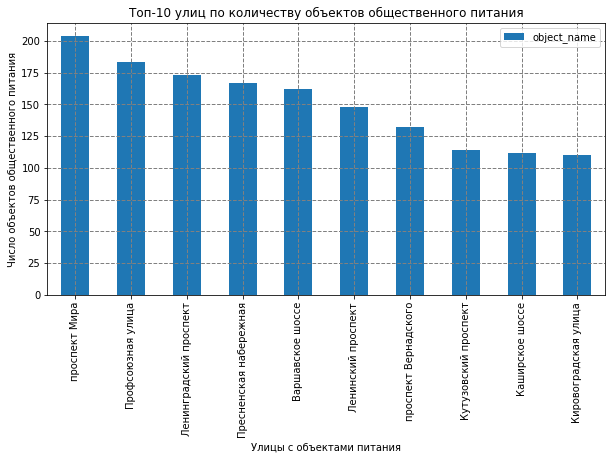

In [56]:
top_10_street.plot(kind='bar', y='object_name', x='street', grid=True, figsize=(10, 5))
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Улицы с объектами питания')
plt.grid(color = 'grey', linewidth = 1, linestyle = '--')
plt.ylabel('Число объектов общественного питания');

Мы определили Топ-10 улиц с размещением объектов общественного питания. В него входят следующие улицы:
проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе	и Кировоградская улица. Число объектов общественного питания варьируется от 204 до 110. 
Длина проспекта мира 8,6 км, Профсоюзной улицы 9,9 км, Ленинградского проспекта 5,6 км, Каширского шоссе 12 км, Кировоградской улицы 4,2 км, то есть это самые протяженные улицы Москвы расположенные в разных частях города, преимущественно на вылетных магистралях и пересекающие один или несколько районов города. На этом фоне выделяется Пресненская набережная, которая имеет длину 600 м на которой располагается деловой центр "Москва-сити" с большим числом высотных зданий. На этой улице расположено 167 объектов общественного питания в Пресненском районе Центрального административного округа.

Выгрузим из внешних источников данные с кодами районов и улицами

In [57]:
from io import BytesIO
import requests

spreadsheet_id = '1M7X6ZoEzDGUV33MymGPf3LkuemAF2JzVn7Jx3gF6SBA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_street_kod_small = pd.read_csv(BytesIO(r.content))
#df_street_kod_small

In [60]:
data_ulitsa = df_street_kod_small.loc[:, ['UM_NAMEF', 'UM_TE']]
data_ulitsa.columns = ['srteet', 'Kod']

Выгрузим из внешних источников данные с кодами районов и районами

In [61]:
from io import BytesIO
import requests

spreadsheet_id = '1iSp6z_EbjpnYNiF7h7rlMzCb8PJJFTtgE65XLmpd4N8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_street_district = pd.read_csv(BytesIO(r.content))
#df_street_district

In [37]:
data_district = df_street_district.loc[:, ['Kod', 'Name']]

Выгрузим из внешних источников данные с нашими ТОП улицами и кодами районов

In [62]:
from io import BytesIO
import requests

spreadsheet_id = '1UevlrQ8ms0HuLZlNsQ2bgciiumhRSld7KLeQEPrM9FE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_export_street_code = pd.read_csv(BytesIO(r.content))
df_export_street_code.columns = ['srteet', 'Kod']
#df_export_street_code.head(10)

Объединим данные по ТОП улицам и районам

In [65]:
df_distr_top_2 = df_export_street_code.merge(data_district, on='Kod')
street_district_top = df_distr_top_2.drop_duplicates()
#street_district_top

Сгруппируем данные по районам в которых размещаются ТОП улицы

In [70]:
df_distr_top_summ = street_district_top.groupby('Name').agg({'srteet': 'count'}).sort_values('srteet', ascending=False)
df_distr_top_summ

,srteet
Name,
район Нагатино-Садовники,2
Обручевский район,2
район Тропарёво-Никулино,2
район Тёплый Стан,2
район Чертаново Северное,2
район Проспект Вернадского,2
район Чертаново Южное,2
район Чертаново Центральное,2
Ломоносовский район,2


Мы получили список из 37 районов Москвы в которых рамзмещаются наши улицы.

<div class="alert alert-info"> <b>Комментарии студента:</b> 

Получил список из 37 районов Москвы в которых рамзмещаются ТОП улицы по количеству объектов общественного питания. </div>

## Найдем число улиц с одним объектом общественного питания. Определим в каких районах Москвы находятся эти улицы.

In [41]:
street_1_object = top_street.query('object_name == 1')
street_1_object.sample(10)

,street,object_name
1315,Глинищевский переулок,1
1432,1-я Миусская улица,1
1635,Пожарский переулок,1
1604,Средняя Калитниковская улица,1
1431,Карельский бульвар,1
1489,2-й Вышеславцев переулок,1
1445,1-й проезд Марьиной Рощи,1
1759,улица Академика Петровского,1
1516,улица Кутузова,1
1439,улица Николаева,1


In [42]:
print('Число улиц с одним объектом общественного питания:',street_1_object['street'].count())

Число улиц с одним объектом общественного питания: 548


Число улиц с одним объектом общественного питания составляет 548 улиц. Данные улицы расположены по всему городу в промзонах, в спальных районах, и районах блице к центральной части города и т.д. Их отличительная особенность - малая длина улицы. 

Определим районы в которых располагаются улицы с одним объектом общественного питания

Объединим данные по улицам и районам

In [71]:
district_ulitsa = data_ulitsa.merge(data_district, left_on=['Kod'], right_on=['Kod'])
#district_ulitsa

Объединим данные предыдущего датафрейма и улиц с одним объектом общественного питания

In [74]:
df_distr_small = street_1_object.merge(district_ulitsa, left_on=['street'], right_on=['srteet'])
#df_distr_small

Получим список районов размещения объектов. Для удобства выделим ТОП 10 районов с улицами с одним объектом питания

In [45]:
df_distr_small_summ = df_distr_small.groupby('Name').agg({'srteet': 'count'}).sort_values('srteet', ascending=False)
df_distr_small_summ.head(10)

,srteet
Name,
Таганский район,25
Басманный район,23
район Хамовники,22
Тверской район,19
район Марьина Роща,16
Пресненский район,15
район Сокольники,15
Мещанский район,12
район Замоскворечье,12


Мы получили список размещения объектов и выделили ТОП 10 районов с улицами с одним объектом питания

## Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности.

In [46]:
data_street = data.loc[:, ['chain', 'object_type', 'number', 'street']]
data_street.sample(10)

,chain,object_type,number,street
10233,да,кафе,28,Олимпийский проспект
8540,нет,кафе,30,Пресненская набережная
14251,нет,закусочная,0,Новочеркасский бульвар
10016,нет,кафе,32,Никитский переулок
10576,нет,кафе,8,Южнопортовая улица
6236,нет,кафе,40,улица Миклухо-Маклая
12210,нет,кафе,20,Ярославское шоссе
10595,нет,закусочная,25,улица Викторенко
1166,да,ресторан,160,Страстной бульвар
5454,да,предприятие быстрого обслуживания,40,Дмитровское шоссе


Выделим 7 улиц с самым большим количеством мест общественного питания

In [47]:
data_street_top = data_street.query('street == "проспект Мира" or street == "Профсоюзная улица" \
    or street == "Ленинградский проспект" or street == "Пресненская набережная" or street == "Варшавское шоссе"\
    or street == "Ленинский проспект" or street == "проспект Вернадского"')
data_street_top

,chain,object_type,number,street
12,нет,столовая,220,Профсоюзная улица
25,нет,буфет,16,Ленинский проспект
36,да,предприятие быстрого обслуживания,20,Варшавское шоссе
48,нет,столовая,22,Ленинградский проспект
50,нет,кафетерий,10,Ленинградский проспект
...,...,...,...,...
15270,да,предприятие быстрого обслуживания,2,Варшавское шоссе
15308,да,кафе,25,Пресненская набережная
15325,да,предприятие быстрого обслуживания,0,Ленинградский проспект
15347,да,кафе,40,Профсоюзная улица


In [48]:
street_top_7 = data_street_top.pivot_table(
    index=['street', 'chain'], values=['object_type', 'number'], 
    aggfunc={'object_type':'count', 'number':'mean'}).round()
street_top_7

number  object_type
street                 chain                     
Варшавское шоссе       да       42.0           43
                       нет      57.0          119
Ленинградский проспект да       41.0           56
                       нет      58.0          117
Ленинский проспект     да       63.0           30
                       нет      63.0          118
Пресненская набережная да       54.0           25
                       нет      44.0          142
Профсоюзная улица      да       55.0           52
                       нет      44.0          131
проспект Вернадского   да       66.0           38
                       нет      67.0           94
проспект Мира          да       79.0           57
                       нет      56.0          147

Для сетевых объектов число посадочных мест выше среднего на улицах проспект Мира, проспект Вернадского и Ленинский проспект.
На улицах проспект Мира, Профсоюзной улице  и на Пресненской набережной среднее число посадочных мест в сетевых объектах больше чем в несетевых.

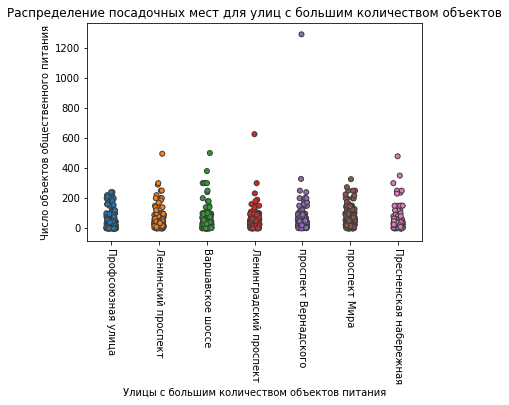

In [49]:
g = sns.stripplot(data=data_street_top, x='street', y='number',
                   linewidth=1)
plt.xticks(rotation=-90)
plt.title('Распределение посадочных мест для улиц с большим количеством объектов')
plt.xlabel('Улицы с большим количеством объектов питания')
plt.ylabel('Число объектов общественного питания');

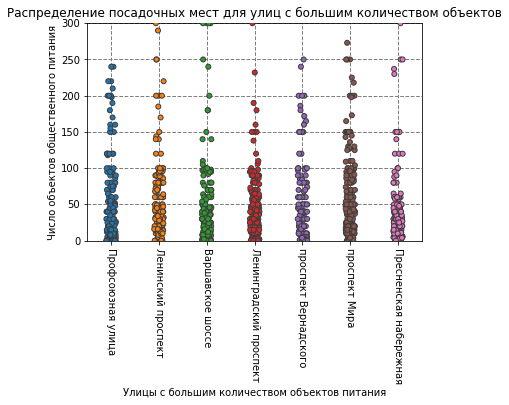

In [50]:
sns.stripplot(data=data_street_top, x='street', y='number', linewidth=1)
plt.ylim(0, 300)
plt.xticks(rotation=-90)
plt.title('Распределение посадочных мест для улиц с большим количеством объектов')
plt.xlabel('Улицы с большим количеством объектов питания')
plt.grid(color = 'grey', linewidth = 1, linestyle = '--')
plt.ylabel('Число объектов общественного питания');

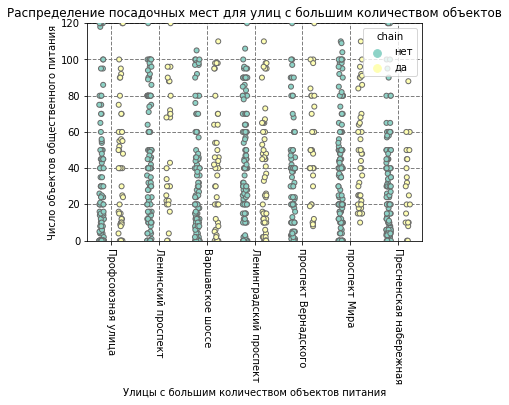

In [51]:
ax = sns.stripplot(x="street", y="number",
                   data=data_street_top, palette="Set3", dodge=True,
                hue="chain", linewidth=1)
plt.ylim(0, 120)
plt.xticks(rotation=-90)
plt.title('Распределение посадочных мест для улиц с большим количеством объектов')
plt.xlabel('Улицы с большим количеством объектов питания')
plt.grid(color = 'grey', linewidth = 1, linestyle = '--')
plt.ylabel('Число объектов общественного питания');

Практически на всех улицах с самым большим количеством объектов общественного питания прослеживаются объекты с числом посадочных мест до 100, на Пресненской набережной такие объекты с числом посадочных мест до 60 (возможно это зависит от стоимости аренды объектов). Далее на всех улицах представлены единичные объекты с большим числом посадочных мест: Профсоюзная улица до 250 мест и Проспект Вернадского с числом мест более 1000.
На всех улицах отношение несетевых объектов к сетевым составляет от 2-х до 3-х, на Пресненской набережной такое соотношение составляет 5.7.

# Шаг 3. Подготовим презентацию исследования для инвесторов в формате pdf

<div class="alert alert-info" role="alert">
    
Презентация: <https://yadi.sk/d/VVCMneeqf-GOBQ> 
    
</div>     

# Шаг 4. Сформулируем выводы и рекомендации

<div class="alert alert-info" role="alert">

Мы проанализировали данные для открытия небольшого кафе в Москве и подготовили исследование рынка общественного питания для инвесторов.
Данные представляют собой датасет с информацией о идентификаторе объектов, названии объекта общественного питания, является ли данное заведение сетевым, тип объекта общественного питания, его адрес и количество посадочных мест.

Шаг 1. Загрузили данные и подготовили их к анализу.

Шаг 2. Анализ данных

Исследовали соотношение видов объектов общественного питания по количеству. Построили график.

Исследовали соотношение сетевых и несетевых заведений по количеству. Построили график.

Определили для какого вида объекта общественного питания характерное сетевое распространение.

Определили, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

Для каждого вида объекта общественного питания описали среднее количество посадочных мест. Определили какой вид предоставляет в среднем самое большое количество посадочных мест. Построили графики.

Построили график топ-10 улиц по количеству объектов общественного питания. Определили в каких районах Москвы находятся эти улицы.

Нашли число улиц с одним объектом общественного питания. Определили в каких районах Москвы находятся эти улицы.

Посмотрели на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявили закономерности.

Шаг 3. Подготовили презентацию исследования для инвесторов в формате pdf. Приложили ссылку на презентацию.
        
    Презентация: <https://yadi.sk/d/VVCMneeqf-GOBQ> 

Шаг 4. Сформулировали выводы и рекомендации
    
Выводы

Проанализировав данные с информацией об объектах общественного питания, мы пришли к следующим выводам: 
    
Общее число исследуемых объектов - 15366; 
Минимальное число посадочных мест - 0; 
Максимальное число посадочных мест - 1700;
Среднее число посадочных мест - 60;
Медианное число - 40.    
    
Большие торговые центры концентрируют большое число объектов общественного питания. Чем больше объект, тем больше в нем данных объектов.
В одном торговом центре располагается объектов больше, чем на многих улицах большой протяженности.    

Тип объекта общественного питания разделен на 9 групп. Самая большая категория - кафе: 6099 объектов; Далее выделяются столовые, рестораны и предприятия быстрого обслуживания их число 2587/2285/1923; Самая малочисленная группа это бары, буфеты, кафетерии, закусочные и магазины с отделами кулинарии.
    
Число сетевых объектов в Москве около 3-х тысяч, что составляет 20% от общего числа всех заведений Москвы    
    
При распределении сетевых объектов общественного питания выделяются кафе с долей в 47%, предприятия быстрого обслуживания в 26.7% и рестораны в 18.3%, доля остальных объектов незначительна   

В сетевых кафе медианное значение посадочных мест составляет 40, среднее 50. Сетевые кафе (пиццерии) работающие в основном на доставку имеют малое число посадочных мест, также заведения в торговых центрах, рассчитанные на большую проходимость (Крошка Картошка, Теремок, Суши Wok), так же имеют мало число посадочных мест. Кофейни (Шоколадница, Кофе Хаус, Starbucks) имеют число посадочных мест выше медианного значения.
    
Для объектов общественного четко выделяется 3 группы с малым, средним и большим числом посадочных мест. Самая большим числом посадочных мест обладают: столовые - в среднем 112 мест и рестораны - в среднем 100 мест. Средняя категория с посадочными местами это бары, кафе и предприятия быстрого обслуживания с числом посадочных мест от 53 до 40; Самыми малыми объекты с посадочными местами это закусочные, буфеты, кафетерии и магазины с отделами кулинарии.    
    
Мы определили Топ-10 улиц с размещением объектов общественного питания. В него входят следующие улицы: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица. Число объектов общественного питания варьируется от 204 до 110. Длина проспекта мира 8,6 км, Профсоюзной улицы 9,9 км, Ленинградского проспекта 5,6 км, Каширского шоссе 12 км, Кировоградской улицы 4,2 км, то есть это самые протяженные улицы Москвы расположенные в разных частях города, преимущественно на вылетных магистралях и пересекающие один или несколько районов города. На этом фоне выделяется Пресненская набережная, которая имеет длину 600 м на которой располагается деловой центр "Москва-сити" с большим числом высотных зданий. На этой улице расположено 167 объектов общественного питания в Пресненском районе Центрального административного округа.    
    
Число улиц с одним объектом общественного питания составляет 548 улиц. Данные улицы расположены по всему городу в промзонах, в спальных районах, и районах блице к центральной части города и т.д. Их отличительная особенность - малая длина улицы. 

Для сетевых объектов число посадочных мест выше среднего на улицах проспект Мира, проспект Вернадского и Ленинский проспект.
На улицах проспект Мира, Профсоюзной улице  и на Пресненской набережной среднее число посадочных мест в сетевых объектах больше чем в несетевых.    

Практически на всех улицах с самым большим количеством объектов общественного питания прослеживаются объекты с числом посадочных мест до 100, на Пресненской набережной такие объекты с числом посадочных мест до 60 (возможно это зависит от стоимости аренды объектов). Далее на всех улицах представлены единичные объекты с большим числом посадочных мест: Профсоюзная улица до 250 мест и Проспект Вернадского с числом мест более 1000. На всех улицах отношение несетевых объектов к сетевым составляет от 2-х до 3-х, на Пресненской набережной такое соотношение составляет 5.7.    
    
</div>        